# L0/2D Files: Reading and Examining the Data Products

## Import Packages

In [1]:
#from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.table import Table
from modules.Utils.kpf_parse import get_datecode
from kpfpipe.models.level0 import KPF0
%matplotlib inline

## Define Directories and Filenames
One needs to have the L0 file KP.20240422.48942.23.fits and the 2D file KP.20240422.48942.23_2D.fits in the `/data/L0/` or `/data/2D/` directories, respectively.  These files can be downloaded from the Keck Observatory Archive (KOA), or, for those participating in the California Planet Search (CPS), using the Jump portal or shrek.caltech.edu.  One can also modify the code below to work with other files or paths.

In [2]:
data_dir = '/data/'
#ObsID = 'KP.20230405.46556.38' # on-sky spectrum of HD 127334 (Commissioning data)
ObsID = 'KP.20240422.28832.89' # on-sky spectrum of TOI-1823 (PI: Howard data)
L0_file = data_dir + 'L0/' + get_datecode(ObsID) + '/' + ObsID + '.fits'
D2_file = data_dir + '2D/' + get_datecode(ObsID) + '/' + ObsID + '_2D.fits'
print(f'L0 filename: {L0_file}')

L0 filename: /data/L0/20240422/KP.20240422.28832.89.fits


## Open File and Show Information
Note that there are exensions for:
  * Header keywords (PRIMARY)
  * Built-in extensions related to the data reduction pipeline (RECEIPT and CONFIG)
  * Four quadrants of the green CCD (GREEN_AMP1, GREEN_AMP2, GREEN_AMP3, GREEN_AMP4); later L0 files uses two amplifiers had have two halves (REEN_AMP1, GREEN_AMP2)
  * Two halves of the red CCD (RED_AMP1, RED_AMP2)
  * Stitched CCD images (GREEN_CCD and RED_CCD; these extensions are empty in L0, but filled in 2D)
  * Variance of stitched CCD images (GREEN_VAR and RED_VAR; these extensions are empty in L0, but filled in 2D)
  * The CCD image from the Ca H&K Spectrometer (CA_HK)
  * Spectral time series for the Exposure Meter (EXPMETER_SCI, EXPMETER_SKY)
  * The guide camera (GUIDECAM, GUIDE_CUBE_ORIGINS or guide_cube_origins)
  * Telemetry, mostly temperatures during the exposure (TELEMETRY)
  * Solar intensity information for exposures using SoCal (SOLAR_IRRADIANCE)

In [3]:
L0 = KPF0.from_fits(L0_file, data_type='KPF')
L0.info()

File name: KP.20240422.28832.89.fits
|Header Name          |# Cards              
|PRIMARY              |                 441 
|RECEIPT              |                   0 
|CONFIG               |                   0 
|GREEN_AMP1           |                  11 
|GREEN_AMP2           |                  11 
|GREEN_CCD            |                   3 
|GREEN_VAR            |                   3 
|RED_AMP1             |                  13 
|RED_AMP2             |                  13 
|RED_CCD              |                   0 
|RED_VAR              |                   0 
|CA_HK                |                  58 
|EXPMETER_SCI         |                 849 
|EXPMETER_SKY         |                 849 
|GUIDECAM             |                   0 
|TELEMETRY            |                  26 
|SOLAR_IRRADIANCE     |                   0 
|GUIDER_CUBE_ORIGINS  |                  87 
|GUIDER_AVG           |                   8 

|Extension Name       |Data Type            |Data Dimension   

## Primary Extension (header keywords)
Here is a list of keywords.  Later data products (2D, L1, L2 add keywords to this list)

In [4]:
L0.header['PRIMARY']

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
FAVER   = '1.5     '           / Written by FITSAssemble version 1.5            
TIMESYS = 'UTC     '                                                            
CAMERAS =                    5 / Detectors in assembly request                  
GREEN   = 'YES     '           / Was this camera found?                         
RED     = 'YES     '           / Was this camera found?                         
CA_HK   = 'YES     '           / Was this camera found?                         
EXPMETER= 'YES     '           / Was this camera found?                         
GUIDE   = 'YES     '           / Was this camera found?                         
STARTIME= '2024-04-22T08:00:

## Extract Keywords
Here we extra the name of the target star and the exposure time and assign them to variables.

In [5]:
starname = L0.header['PRIMARY']['TARGNAME']
Texp = L0.header['PRIMARY']['GRELAPS'] # actually, this is the green CCD exposure time
print('Star = ' + starname)
print('Exposure time = ' + str(Texp) + ' sec')

Star = T001823
Exposure time = 600.068 sec


Note that the above code uses `KPF0.from_fits()` to read KPF fits files.  This is the prefered method because the output is a KPF object, which has some built-in properties that are not generated by with `from astropy.io import fits` and then `L0 = fits.open(L0_file)`.

One difference is that the headers in the object created by the Astropy version of from_fits() are accessed like `L0['PRIMARY'].header` and `L0['PRIMARY'].header['TARGNAME']`, not `L0.header['PRIMARY']` and `L0.header['PRIMARY']['TARGNAME']` as above with the KPF objects.

## Green CCD
There are two halves or four quadrants in the green CCD with separate extensions (depending on the read most; KPF has been operating in two-amplifier mode with the Green CCD since mid-2023). Let's plot one of them.

<Figure size 432x288 with 0 Axes>

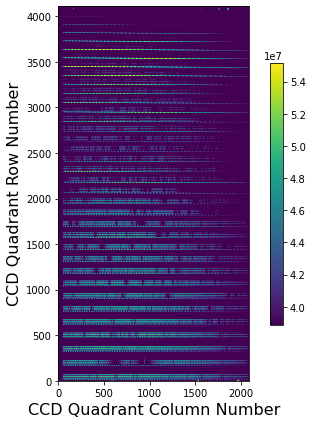

In [6]:
plt.figure(tight_layout=True)
plt.figure(figsize=(6, 6), tight_layout=True)
plt.imshow(L0['GREEN_AMP2'].data, cmap='viridis', origin='lower', 
           vmin=np.percentile(L0['GREEN_AMP1'].data,0.1), 
           vmax=np.percentile(L0['GREEN_AMP1'].data,99))
plt.xlabel('CCD Quadrant Column Number', fontsize=16)
plt.ylabel('CCD Quadrant Row Number', fontsize=16)
plt.colorbar(shrink=0.7)
plt.grid(False)
plt.show()

## Red CCD
There are two halves for the Red CCD (when read out in 2-amplifier mode).  Let's plot one of them

<Figure size 432x288 with 0 Axes>

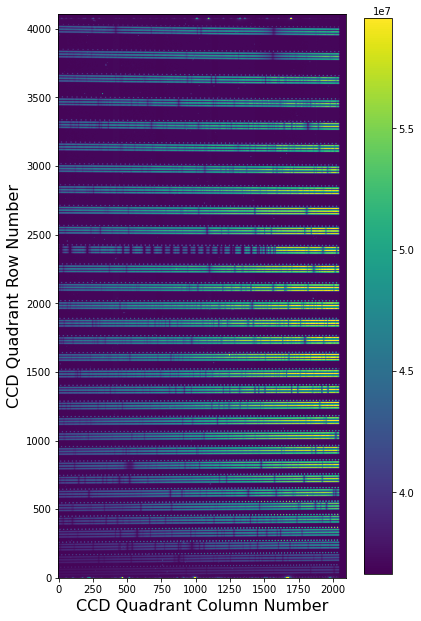

In [7]:
plt.figure(tight_layout=True)
plt.figure(figsize=(6, 12), tight_layout=True)
plt.imshow(L0['RED_AMP1'].data, cmap='viridis', origin='lower', 
           vmin=np.percentile(L0['RED_AMP1'].data,0.1), 
           vmax=np.percentile(L0['RED_AMP1'].data,99))
plt.xlabel('CCD Quadrant Column Number', fontsize=16)
plt.ylabel('CCD Quadrant Row Number', fontsize=16)
plt.colorbar(shrink=0.66)
plt.grid(False)
plt.show()

## 2D File
The 2D file is similar to L0 except that the image segments of the green and red CCDs have been assembled (prescan and overcal removed) and bias has been subtracted.  Note that this example uses the from_fits() method from the KPF DRP.

In [8]:
D2 = KPF0.from_fits(D2_file, data_type='KPF')
D2.info()

File name: KP.20240422.28832.89_2D.fits
|Header Name          |# Cards              
|PRIMARY              |                 519 
|RECEIPT              |                  29 
|CONFIG               |                  13 
|GREEN_AMP1           |                  22 
|GREEN_AMP2           |                  22 
|GREEN_CCD            |                  11 
|GREEN_VAR            |                   9 
|RED_AMP1             |                  22 
|RED_AMP2             |                  22 
|RED_CCD              |                  11 
|RED_VAR              |                   9 
|CA_HK                |                  56 
|EXPMETER_SCI         |                 849 
|EXPMETER_SKY         |                 849 
|GUIDECAM             |                   7 
|TELEMETRY            |                  26 
|SOLAR_IRRADIANCE     |                   9 
|GUIDER_CUBE_ORIGINS  |                  87 
|GUIDER_AVG           |                   8 

|Extension Name       |Data Type            |Data Dimension

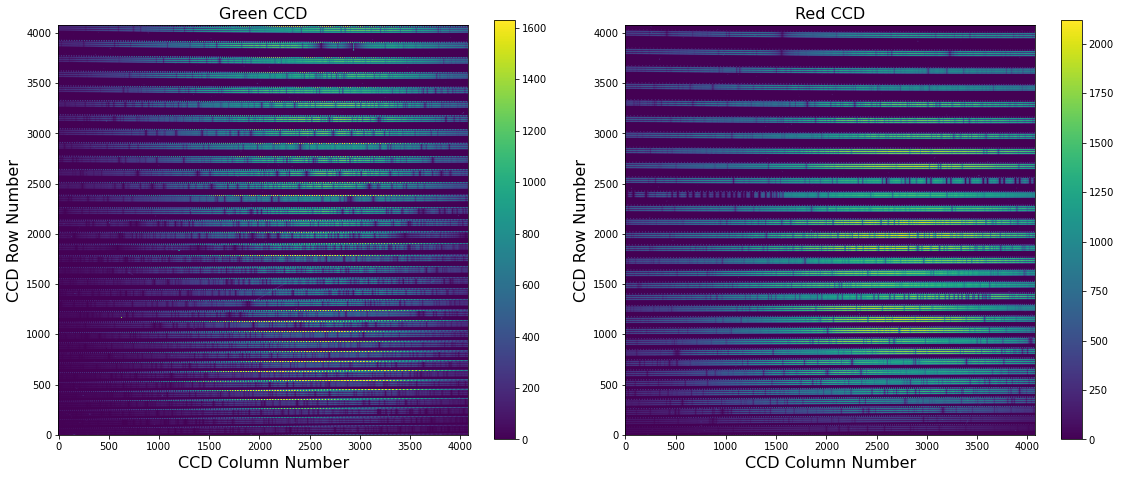

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16,10), tight_layout=True)
im1 = axs[0].imshow(D2['GREEN_CCD'].data, cmap='viridis', origin='lower', vmin=0, vmax=np.percentile(D2['GREEN_CCD'].data,99))
axs[0].set_title('Green CCD', fontsize=16)
axs[0].set_xlabel('CCD Column Number', fontsize=16)
axs[0].set_ylabel('CCD Row Number', fontsize=16)
fig.colorbar(im1, ax=axs[0], shrink=0.6)
im2 = axs[1].imshow(D2['RED_CCD'].data, cmap='viridis', origin='lower', vmin=0, vmax=np.percentile(D2['RED_CCD'].data,99))
axs[1].set_title('Red CCD', fontsize=16)
axs[1].set_xlabel('CCD Column Number', fontsize=16)
axs[1].set_ylabel('CCD Row Number', fontsize=16)
fig.colorbar(im2, ax=axs[1], shrink=0.6)
axs[0].grid(False)
axs[1].grid(False)
plt.subplots_adjust(wspace=0.4)
plt.show()

## Exposure Meter
Back in the L0 file, there are extensions for the EM SCI and EM SKY fibers.  The example below is for EM SCI, but EM SKY is similar.  Here we create a Pandas data frame with the spectral time series.  Each row is a spectrum for light collected between Date-Beg and Date-End.  This example uses the from_fits() method of the KPF DRP to read the L0 file.  If one uses the Astropy from_fits() method, then the EM SCI data frame can be created using `df_SCI_EM = Table.read(L0_file, format='fits',hdu='EXPMETER_SCI').to_pandas()`.

In [10]:
df_SCI_EM = L0['EXPMETER_SCI']
df_SCI_EM

,Date-Beg,Date-End,Date-Beg-Corr,Date-End-Corr,872.5,869.1,865.8,862.4,859.2,855.9,...,447.8,447.4,447.1,446.8,446.4,446.1,445.8,445.4,445.1,444.8
0,2024-04-22T08:00:32.437,2024-04-22T08:00:34.567,2024-04-22T08:00:32.886,2024-04-22T08:00:34.567,1137.109803,1066.929803,1170.369803,1034.909803,1166.109803,1118.889803,...,136.609803,98.029803,119.609803,-36.930197,83.449803,83.069803,112.289803,85.769803,34.949803,154.969803
1,2024-04-22T08:00:35.386,2024-04-22T08:00:37.524,2024-04-22T08:00:35.386,2024-04-22T08:00:37.524,1513.631970,1477.451970,1373.891970,1453.431970,1357.631970,1429.411970,...,75.131970,6.551970,24.131970,115.591970,106.971970,141.591970,-24.188030,53.291970,207.471970,103.491970
2,2024-04-22T08:00:38.345,2024-04-22T08:00:40.483,2024-04-22T08:00:38.345,2024-04-22T08:00:40.483,1481.001429,1394.821429,1465.261429,1496.801429,1525.001429,1465.781429,...,34.501429,125.921429,131.501429,157.961429,79.341429,54.961429,133.181429,72.661429,-14.158571,170.861429
3,2024-04-22T08:00:41.302,2024-04-22T08:00:43.440,2024-04-22T08:00:41.302,2024-04-22T08:00:43.440,1502.395517,1430.215517,1503.655517,1413.195517,1542.395517,1632.175517,...,80.895517,58.315517,97.895517,-20.644483,136.735517,126.355517,88.575517,56.055517,9.235517,123.255517
4,2024-04-22T08:00:44.260,2024-04-22T08:00:46.395,2024-04-22T08:00:44.260,2024-04-22T08:00:46.395,1472.351182,1414.171182,1482.611182,1552.151182,1376.351182,1465.131182,...,-28.148818,33.271182,72.851182,151.311182,155.691182,65.311182,-11.468818,87.011182,51.191182,123.211182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2024-04-22T08:10:20.014,2024-04-22T08:10:22.143,2024-04-22T08:10:20.014,2024-04-22T08:10:22.143,1414.764975,1381.584975,1529.024975,1372.564975,1535.764975,1531.544975,...,69.264975,92.684975,79.264975,54.724975,58.104975,144.724975,21.944975,43.424975,136.604975,37.624975
200,2024-04-22T08:10:22.969,2024-04-22T08:10:25.110,2024-04-22T08:10:22.969,2024-04-22T08:10:25.110,1438.188621,1411.008621,1453.448621,1551.988621,1459.188621,1596.968621,...,104.688621,27.108621,90.688621,83.148621,-13.471379,74.148621,112.368621,91.848621,145.028621,92.048621
201,2024-04-22T08:10:25.917,2024-04-22T08:10:28.052,2024-04-22T08:10:25.917,2024-04-22T08:10:28.052,1488.040837,1386.860837,1488.300837,1482.840837,1646.040837,1548.820837,...,152.540837,53.960837,18.540837,90.000837,92.380837,132.000837,12.220837,113.700837,76.880837,79.900837
202,2024-04-22T08:10:28.879,2024-04-22T08:10:31.018,2024-04-22T08:10:28.879,2024-04-22T08:10:31.018,1361.774828,1430.594828,1326.034828,1389.574828,1396.774828,1491.554828,...,-24.725172,13.694828,109.274828,52.734828,101.114828,-19.265172,53.954828,24.434828,112.614828,-12.365172


## Convert Exposure Meter Data into Flux Measurements

In [11]:
# Gain of CCD in KPF Exposure Meter
EM_gain = 1.48424 # e-/ADU

# Define wavelength arrays and disperion at each wavelength (nm per pixel)
wav_SCI_str = df_SCI_EM.columns[4:]               # string (center) wavelengths of each pixel
wav_SCI     = df_SCI_EM.columns[4:].astype(float) # float  (center) wavelengths of each pixel
disp_SCI        = wav_SCI*0+np.gradient(wav_SCI,1)*-1
disp_SCI_smooth = np.polyval(np.polyfit(wav_SCI,disp_SCI, deg=6),wav_SCI)

# define normalized flux array (e- / nm / time)
df_SCI_EM_norm = df_SCI_EM[wav_SCI_str] * EM_gain / disp_SCI_smooth

# define time arrays
date_beg = np.array(df_SCI_EM["Date-Beg-Corr"], dtype=np.datetime64)
date_end = np.array(df_SCI_EM["Date-End-Corr"], dtype=np.datetime64)
tdur_sec = (date_end-date_beg).astype(float)/1000. # array exposure durations in sec
time     = (date_beg-date_beg[0])/1000 # array of times since beginning in sec

# define indices for wavelength
ind_550m    = np.where((wav_SCI <  550))
ind_550_650 = np.where((wav_SCI >= 550) & (wav_SCI < 650))
ind_650_750 = np.where((wav_SCI >= 650) & (wav_SCI < 750))
ind_750p    = np.where((wav_SCI >= 750))



# define flux arrays
int_SCI_spec         = df_SCI_EM_norm[1:-1].sum(axis=0) / np.sum(tdur_sec[1:-1]) # flux vs. wavelength per sec (use first five samples)
int_SCI_flux         = df_SCI_EM.sum(axis=1)                                     # flux (ADU) vs. time (per sample)
int_SCI_flux_550m    = df_SCI_EM[wav_SCI_str[np.where((wav_SCI <  550))]].sum(axis=1)
int_SCI_flux_550_650 = df_SCI_EM[wav_SCI_str[np.where((wav_SCI >= 550) & (wav_SCI < 650))]].sum(axis=1)
int_SCI_flux_650_750 = df_SCI_EM[wav_SCI_str[np.where((wav_SCI >= 650) & (wav_SCI < 750))]].sum(axis=1)
int_SCI_flux_750p    = df_SCI_EM[wav_SCI_str[np.where((wav_SCI >= 750))]].sum(axis=1)

## Plot EM SCI Spectrum

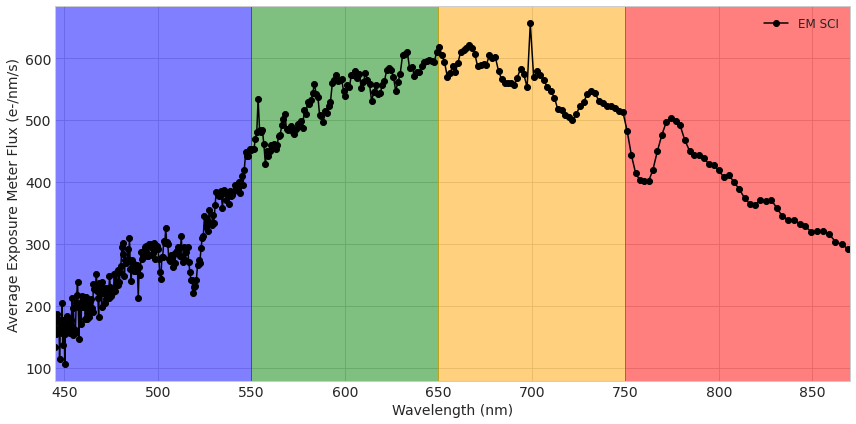

In [12]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 6), tight_layout=True)
plt.axvspan(440, 550, alpha=0.5, color='b') 
plt.axvspan(550, 650, alpha=0.5, color='g') 
plt.axvspan(650, 750, alpha=0.5, color='orange') 
plt.axvspan(750, 880, alpha=0.5, color='red') 
plt.plot(wav_SCI, int_SCI_spec, marker='o', color='k')
plt.xlabel("Wavelength (nm)", fontsize=14)
plt.ylabel("Average Exposure Meter Flux (e-/nm/s)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(445,870)
plt.legend(["EM SCI"], fontsize=12, loc='best') 
plt.show()
#plt.savefig('expmeter_flux_vs_wavelength.png',dpi=144)

## Plot EM SCI Time Series

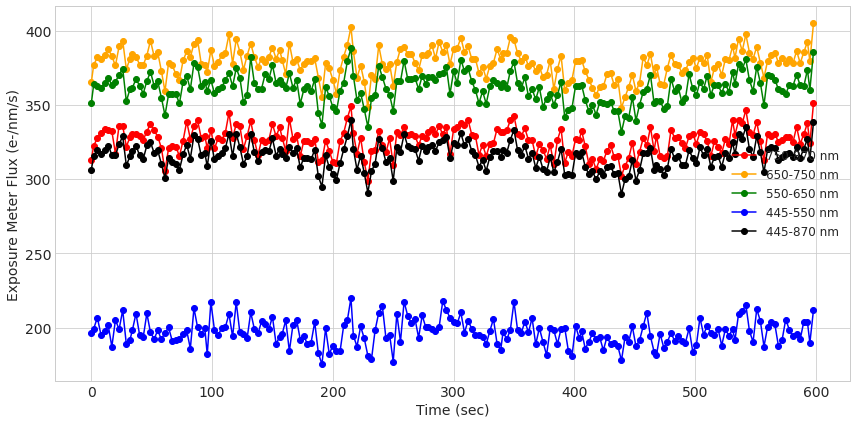

In [13]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 6), tight_layout=True)
plt.plot(time, int_SCI_flux_750p    / ((847+4.8/2)-750)           / tdur_sec, marker='o', color='r')
plt.plot(time, int_SCI_flux_650_750 / (750-650)                   / tdur_sec, marker='o', color='orange')
plt.plot(time, int_SCI_flux_550_650 / (650-550)                   / tdur_sec, marker='o', color='g')
plt.plot(time, int_SCI_flux_550m    / (550-(450.1-0.4/2))         / tdur_sec, marker='o', color='b')
plt.plot(time, int_SCI_flux         / ((847+4.8/2)-(450.1-0.4/2)) / tdur_sec, marker='o', color='k')
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Exposure Meter Flux (e-/nm/s)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["750-870 nm","650-750 nm","550-650 nm","445-550 nm","445-870 nm",], fontsize=12, loc='best') 
plt.show()

## Plot Fraction of Flux Time Series in Each Color Bin
This is a measure of the ADC performance.

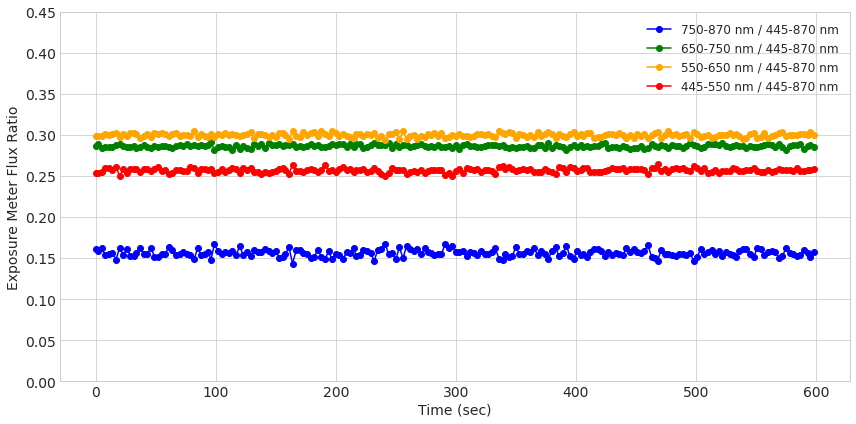

In [14]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 6), tight_layout=True)
plt.plot(time, (int_SCI_flux_550m    / int_SCI_flux ) , marker='o', color='b')
plt.plot(time, (int_SCI_flux_550_650 / int_SCI_flux ) , marker='o', color='g')
plt.plot(time, (int_SCI_flux_650_750 / int_SCI_flux ) , marker='o', color='orange')
plt.plot(time, (int_SCI_flux_750p    / int_SCI_flux ) , marker='o', color='r')
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Exposure Meter Flux Ratio", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,0.45)
plt.legend(["750-870 nm / 445-870 nm", 
            "650-750 nm / 445-870 nm", 
            "550-650 nm / 445-870 nm", 
            "445-550 nm / 445-870 nm"], 
           fontsize=12, loc='best') 
plt.show()
#plt.savefig('EM_flux_ratio_51peg.png')

## Telemetry
Each KPF L0 file contains telemetry on >100 sensors or state values with average, standard deviation, minimum, and maximum values listed.

In [15]:
#L0['TELEMETRY']
df_telemetry = L0['TELEMETRY']
df_telemetry.set_index("keyword", inplace=True)
df_telemetry

,average,stddev,min,max,units,description
keyword,,,,,,
kpfmet.BENCH_BOTTOM_BETWEEN_CAMERAS,14.3361,0.000524517,14.335,14.337,degC,Bench Bottom Between Cameras C2 c- double degC...
kpfmet.BENCH_BOTTOM_COLLIMATOR,14.7717,0.000540249,14.771,14.773,degC,Bench Bottom Coll C3 c- double degC {%.3f}
kpfmet.BENCH_BOTTOM_DCUT,14.5422,0.00048175,14.541,14.543,degC,Bench Bottom D-cut C4 c- double degC {%.3f}
kpfmet.BENCH_BOTTOM_ECHELLE,14.7104,0.000569869,14.709,14.712,degC,Bench Bottom Echelle Cam B c- double degC {%.3f}
kpfmet.BENCH_TOP_BETWEEN_CAMERAS,14.2793,0.000488698,14.278,14.28,degC,Bench Top Between Cameras D4 c- double degC {%...
...,...,...,...,...,...,...
kpfmot.AGITAMBI_T,25.8256,0.120058,25.37,26.07,degC,Agitator ambient temperature c- double degC {%...
kpfmot.AGITMOT_T,0.448866,0.00922575,0.42,0.48,degC,Agitator motor temperature c- double degC {%.2...
kpfpower.OUTLET_A1_Amps,49.4141,1.42826,27,51,milliamps,Outlet A1 current amperage c- int milliamps


If one uses the Astropy from_fits() method, then the telemetry data frame can be created as shown below.

```
df_telemetry = Table.read(L0_file, format='fits', hdu='TELEMETRY').to_pandas()  
num_columns = ['average', 'stddev', 'min', 'max']
for column in df_telemetry:
    df_telemetry[column] = df_telemetry[column].str.decode('utf-8')
    df_telemetry = df_telemetry.replace('-nan', 0)# replace nan with 0
    if column in num_columns:
        df_telemetry[column] = pd.to_numeric(df_telemetry[column], downcast="float")
    else:
        df_telemetry[column] = df_telemetry[column].astype(str)
df_telemetry.set_index("keyword", inplace=True)
```

In [16]:
df_telemetry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, kpfmet.BENCH_BOTTOM_BETWEEN_CAMERAS to kpfmon.NTPWMS_SERVER
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   average      131 non-null    object
 1   stddev       131 non-null    object
 2   min          131 non-null    object
 3   max          131 non-null    object
 4   units        131 non-null    object
 5   description  131 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


Print the entire table of telemetry.

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df_telemetry)

,average,stddev,min,max,units,description
keyword,,,,,,
kpfmet.BENCH_BOTTOM_BETWEEN_CAMERAS,14.3361,0.000524517,14.335,14.337,degC,Bench Bottom Between Cameras C2 c- double degC...
kpfmet.BENCH_BOTTOM_COLLIMATOR,14.7717,0.000540249,14.771,14.773,degC,Bench Bottom Coll C3 c- double degC {%.3f}
kpfmet.BENCH_BOTTOM_DCUT,14.5422,0.00048175,14.541,14.543,degC,Bench Bottom D-cut C4 c- double degC {%.3f}
kpfmet.BENCH_BOTTOM_ECHELLE,14.7104,0.000569869,14.709,14.712,degC,Bench Bottom Echelle Cam B c- double degC {%.3f}
kpfmet.BENCH_TOP_BETWEEN_CAMERAS,14.2793,0.000488698,14.278,14.28,degC,Bench Top Between Cameras D4 c- double degC {%...
kpfmet.BENCH_TOP_COLL,14.8719,0.000536114,14.871,14.873,degC,Bench Top Coll D5 c- double degC {%.3f}
kpfmet.BENCH_TOP_DCUT,14.5873,0.000516643,14.586,14.588,degC,Bench Top D-cut D3 c- double degC {%.3f}
kpfmet.BENCH_TOP_ECHELLE_CAM,14.6172,0.000505709,14.616,14.618,degC,Bench Top Echelle Cam D1 c- double degC {%.3f}
kpfmet.CALEM_SCMBLR_CHMBR_END,15.2488,0.000700176,15.248,15.25,degC,Cal EM Scrammbler Chamber End C1 c- double deg...


In [18]:
print('Red CCD Temperature = ', df_telemetry.loc['kpfred.STA_CCD_T', 'average'], '+/-', df_telemetry.loc['kpfred.STA_CCD_T', 'stddev'], df_telemetry.loc['kpfred.STA_CCD_T', 'units'])

Red CCD Temperature =  -99.9998 +/- 0.00199971 degC


## Guider Image
The guide camera images are from a CRED-2 camera with 0.056 arcsec pixels in a 950-1200nm passband (approximately z+J band).  First, we will fit the image with a Moffat function (assuming a point source).

In [19]:
from scipy.optimize import curve_fit

guider_im = D2['GUIDER_AVG'].data - np.median(D2['GUIDER_AVG'].data)
header = D2.header['PRIMARY']
pixel_scale = 0.056 # arcsec per pixel for the CRED-2 imager on the KPF FIU

def moffat_2D(xy, amplitude, x0, y0, alpha, beta):
    x, y = xy
    return amplitude * (1 + ((x - x0) ** 2 + (y - y0) ** 2) / alpha ** 2) ** -beta

x = np.arange(guider_im.shape[1])
y = np.arange(guider_im.shape[0])
X, Y = np.meshgrid(x, y)
x_flat = X.flatten()
y_flat = Y.flatten()
image_data_flat = guider_im.flatten()
p0 = [1, 18.5/0.056, 14.5/0.056, 5.0/0.056, 2.5]  # Initial guess for the parameters
#p0 = [1, header['GCCRPIX1']/2, header['GCCRPIX2']/2, 5.0/0.056, 2.5]  # Initial guess for the parameters
#p0 = [1, guider_im.shape[1] / 2, guider_im.shape[0] / 2, 5/0.056, 2]  # Initial guess for the parameters
popt, pcov = curve_fit(moffat_2D, (x_flat, y_flat), image_data_flat, p0=p0)
amplitude_fit, x0_fit, y0_fit, alpha_fit, beta_fit = popt
print('amplitude = ' + str(amplitude_fit))
print('seeing = ' + str(alpha_fit*0.056) + ' arcsec')
print('beta = ' + str(beta_fit))
print('x0 = ' + str(x0_fit) + ' pixels')
print('y0 = ' + str(y0_fit) + ' pixels')

image_fit = moffat_2D((X, Y), amplitude_fit, x0_fit, y0_fit, alpha_fit, beta_fit)
resid_im = guider_im - image_fit

amplitude = 2722.5908545066213
seeing = 0.45787570559734353 arcsec
beta = 3.1714690594664794
x0 = 342.13993554679377 pixels
y0 = 264.4009311512574 pixels


## Plot Guider Image and Model Fit

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator


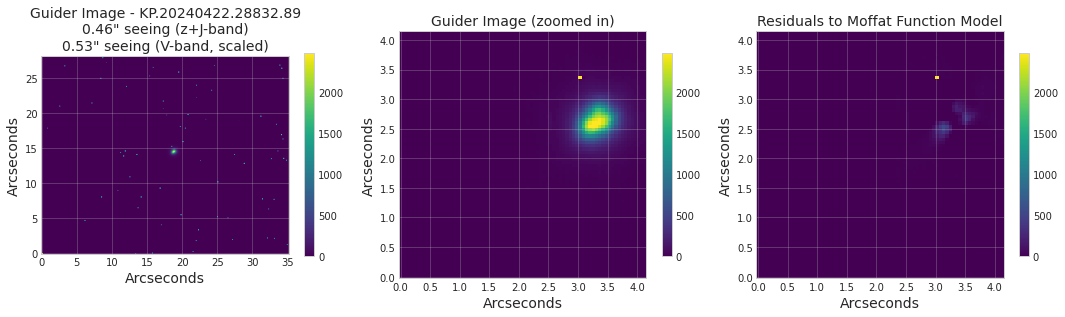

In [20]:
import matplotlib.ticker as ticker

# Plot the original image and residuals
guider_im_zoom = guider_im[255-38:255+38, 320-38:320+38]
resid_im_zoom =   resid_im[255-38:255+38, 320-38:320+38]
#subx0 = D2['GUIDER_AVG'].header['SUBX0']
#subx1 = D2['GUIDER_AVG'].header['SUBX1']
#suby0 = D2['GUIDER_AVG'].header['SUBY0']
#suby1 = D2['GUIDER_AVG'].header['SUBY1']
#guider_im_zoom = guider_im[subx0:subx1, suby0:suby1]
#resid_im_zoom  = guider_im[subx0:subx1, suby0:suby1]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Left panel - full image
im1 = axs[0].imshow(guider_im, cmap='viridis', origin='lower', vmin=0, vmax=np.percentile(guider_im_zoom,99.9))
axs[1].set_aspect(640/512)
image_size_pixels = guider_im.shape
image_size_arcsec = (image_size_pixels[1] * pixel_scale, image_size_pixels[0] * pixel_scale)
x_tick_locator = ticker.MultipleLocator(5/(pixel_scale-0.001))  # Set tick every 5 arcsec
axs[0].xaxis.set_major_locator(x_tick_locator)
y_tick_locator = ticker.MultipleLocator(5/(pixel_scale-0.001))  # Set tick every 5 arcsec
axs[0].yaxis.set_major_locator(y_tick_locator)
xticks = axs[0].get_xticks()
yticks = axs[0].get_yticks()
axs[0].set_xticklabels([f'{int(x * pixel_scale)}' for x in xticks])
axs[0].set_yticklabels([f'{int(y * pixel_scale)}' for y in yticks])
axs[0].set_xlabel('Arcseconds', fontsize=14)
axs[0].set_ylabel('Arcseconds', fontsize=14)
axs[0].set_title('Guider Image - '+str(ObsID)+'\n' + 
                 f"{alpha_fit*pixel_scale:.2f}" + '" seeing (z+J-band)\n' +
                 f"{alpha_fit*pixel_scale*(1100/550)**0.2:.2f}" + '" seeing (V-band, scaled)', fontsize=14)
axs[0].grid(True, linestyle='solid', linewidth=0.5, alpha=0.5)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.6)

# Middle panel - zoomed image
im2 = axs[1].imshow(guider_im_zoom, cmap='viridis', origin='lower', vmin=0, vmax=np.percentile(guider_im_zoom,99.9))
axs[1].set_aspect('equal')
image_size_pixels = guider_im_zoom.shape
image_size_arcsec = (image_size_pixels[1] * pixel_scale, image_size_pixels[0] * pixel_scale)
x_tick_locator = ticker.MultipleLocator(0.5/(pixel_scale-0.001))  # Set tick every 0.5 arcsec
axs[1].xaxis.set_major_locator(x_tick_locator)
y_tick_locator = ticker.MultipleLocator(0.5/(pixel_scale-0.001))  # Set tick every 0.5 arcsec
axs[1].yaxis.set_major_locator(y_tick_locator)
xticks = axs[1].get_xticks()
yticks = axs[1].get_yticks()
axs[1].set_xticklabels([f'{int(x * pixel_scale*10)/10}' for x in xticks])
axs[1].set_yticklabels([f'{int(y * pixel_scale*10)/10}' for y in yticks])
axs[1].set_xlabel('Arcseconds', fontsize=14)
axs[1].set_ylabel('Arcseconds', fontsize=14)
axs[1].set_title('Guider Image (zoomed in)', fontsize=14)
axs[1].grid(True, linestyle='solid', linewidth=0.5, alpha=0.5)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.6)

# Right panel - zoomed image of residuals to model
im2 = axs[2].imshow(resid_im_zoom, cmap='viridis', origin='lower', vmin=0, vmax=np.percentile(guider_im_zoom,99.9))
image_size_pixels = guider_im_zoom.shape
image_size_arcsec = (image_size_pixels[1] * pixel_scale, image_size_pixels[0] * pixel_scale)
x_tick_locator = ticker.MultipleLocator(0.5/(pixel_scale-0.001))  # Set tick every 0.5 arcsec
axs[2].xaxis.set_major_locator(x_tick_locator)
y_tick_locator = ticker.MultipleLocator(0.5/(pixel_scale-0.001))  # Set tick every 0.5 arcsec
axs[2].yaxis.set_major_locator(y_tick_locator)
xticks = axs[2].get_xticks()
yticks = axs[2].get_yticks()
axs[2].set_xticklabels([f'{int(x * pixel_scale*10)/10}' for x in xticks])
axs[2].set_yticklabels([f'{int(y * pixel_scale*10)/10}' for y in yticks])
axs[2].set_xlabel('Arcseconds', fontsize=14)
axs[2].set_ylabel('Arcseconds', fontsize=14)
axs[2].set_title('Residuals to Moffat Function Model', fontsize=14)
axs[2].grid(True, linestyle='solid', linewidth=0.5, alpha=0.5)
cbar3 = plt.colorbar(im2, ax=axs[2], shrink=0.6)

plt.tight_layout()
plt.show()
#plt.savefig('guider_image.png',dpi=144)
plt.close()

## Examine and Plot Guider Performance Time Series

In [21]:
df_GUIDER = Table.read(L0_file, format='fits',hdu='guider_cube_origins').to_pandas()
df_GUIDER

,subframe_id,timestamp,target_x,target_y,command_x,command_y,object1_flux,object1_tnpix,object1_npix,object1_peak,...,object3_tnpix,object3_npix,object3_peak,object3_x,object3_y,object3_a,object3_b,object3_theta,object3_errxy,object3_thresh
0,0,1.713773e+09,342.167,264.438,-0.131590,-0.051213,225389.0,1,0,5389.0,...,0,0,0.0,-999.0,-999.0,0.0,0.0,0.0,0.0,-999.0
1,1,1.713773e+09,342.167,264.438,-0.076432,-0.073256,226913.0,1,0,6262.0,...,0,0,0.0,-999.0,-999.0,0.0,0.0,0.0,0.0,-999.0
2,2,1.713773e+09,342.167,264.438,-0.069403,-0.044836,225183.0,1,0,5373.0,...,0,0,0.0,-999.0,-999.0,0.0,0.0,0.0,0.0,-999.0
3,3,1.713773e+09,342.167,264.438,-0.081925,-0.068397,227190.0,1,0,4778.0,...,0,0,0.0,-999.0,-999.0,0.0,0.0,0.0,0.0,-999.0
4,4,1.713773e+09,342.167,264.438,-0.154436,-0.041921,226220.0,1,0,4795.0,...,0,0,0.0,-999.0,-999.0,0.0,0.0,0.0,0.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59852,59852,1.713773e+09,341.999,264.385,0.055486,0.077842,227271.0,1,0,4626.0,...,0,0,0.0,-999.0,-999.0,0.0,0.0,0.0,0.0,-999.0
59853,59853,1.713773e+09,341.999,264.385,0.010104,0.070314,226251.0,1,0,4775.0,...,0,0,0.0,-999.0,-999.0,0.0,0.0,0.0,0.0,-999.0
59854,59854,1.713773e+09,341.999,264.385,0.026153,0.040634,226465.0,1,0,4687.0,...,0,0,0.0,-999.0,-999.0,0.0,0.0,0.0,0.0,-999.0
59855,59855,1.713773e+09,341.999,264.385,0.000000,0.000000,0.0,0,0,0.0,...,0,0,0.0,-999.0,-999.0,0.0,0.0,0.0,0.0,-999.0


In the plot below, note that the tip-tilt mirror was only operating correctly in the Y direction, hence larger motion in the X direction.

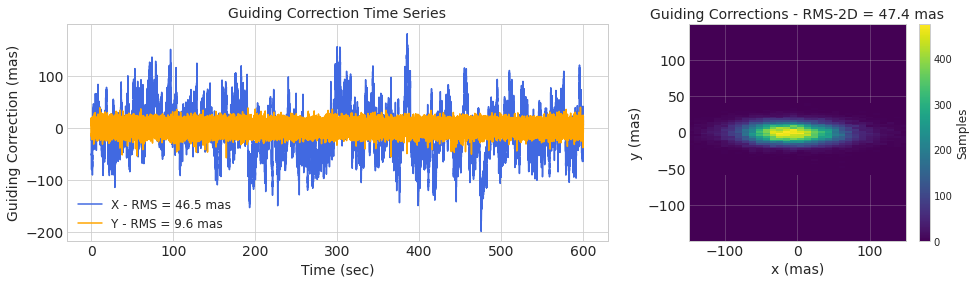

In [22]:
# Trim bad data
df_GUIDER = df_GUIDER[df_GUIDER.timestamp != 0.0]    # remove bogus rows
df_GUIDER = df_GUIDER[df_GUIDER.object1_flux != 0.0] # remove bogus rows

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [2, 1]})
plt.style.use('seaborn-whitegrid')

# precompute variables:
time_sec = df_GUIDER.timestamp-min(df_GUIDER.timestamp)
x_mas = (df_GUIDER.target_x - df_GUIDER.object1_x) * pixel_scale * 1000
y_mas = (df_GUIDER.target_y - df_GUIDER.object1_y) * pixel_scale * 1000
r_mas = (x_mas**2+y_mas**2)**0.5
x_rms = (np.nanmean(x_mas**2))**0.5
y_rms = (np.nanmean(y_mas**2))**0.5
r_rms = (np.nanmean(r_mas**2))**0.5

# Plot the data
im1 = axes[1].hist2d(x_mas, y_mas, bins=40, cmap='viridis')
cmap = plt.get_cmap('viridis')
xylim = max(round(np.nanpercentile(abs(x_mas), 99))*1.2, round(np.nanpercentile(abs(y_mas), 99))*1.2)
axes[1].set_xlim(-xylim, xylim) # set symmetric limits for x and y
axes[1].set_ylim(-xylim, xylim)
axes[1].set_aspect('equal')
axes[1].set_facecolor(cmap(0))
axes[1].set_title("Guiding Corrections - RMS-2D = " + f'{int(r_rms*10)/10}'+' mas', fontsize=14)
axes[1].set_xlabel('x (mas)', fontsize=14)
axes[1].set_ylabel('y (mas)', fontsize=14)
axes[1].grid(True, linestyle='solid', linewidth=0.5, alpha=0.5)
cbar = plt.colorbar(im1[3])
cbar.set_label('Samples', fontsize=12)

axes[0].plot(time_sec, x_mas, color='royalblue')
axes[0].plot(time_sec, y_mas, color='orange')
axes[0].set_title("Guiding Correction Time Series", fontsize=14)
axes[0].set_xlabel("Time (sec)", fontsize=14)
axes[0].set_ylabel("Guiding Correction (mas)", fontsize=14)
axes[0].legend(['X - RMS = ' + f'{int(x_rms*10)/10}' + ' mas', 
                'Y - RMS = ' + f'{int(y_rms*10)/10}' + ' mas'], 
                fontsize=12, loc='best') 

# Set the font size of tick mark labels
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14)

# Display the plots
plt.show()
#plt.savefig('guider_corrections.png',dpi=144)

## Plot Flux Time Series from Guider and Exposure Meter

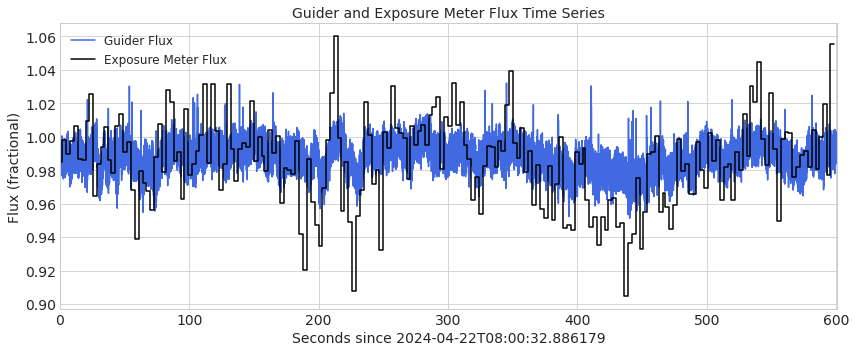

In [23]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 5), tight_layout=True)
plt.plot(df_GUIDER.timestamp-min(df_GUIDER.timestamp), df_GUIDER.object1_flux/np.percentile(df_GUIDER.object1_flux, 95), color='royalblue')
plt.step(time, int_SCI_flux / ((847+4.8/2)-(450.1-0.4/2)) / tdur_sec / max(int_SCI_flux / ((847+4.8/2)-(450.1-0.4/2)) / tdur_sec) * 1.06, color='k')
plt.title("Guider and Exposure Meter Flux Time Series", fontsize=14)
plt.xlabel("Seconds since " + str(header['DATE-BEG']), fontsize=14)
plt.ylabel("Flux (fractional)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(min(df_GUIDER.timestamp-min(df_GUIDER.timestamp)), max(df_GUIDER.timestamp-min(df_GUIDER.timestamp)))
plt.legend(['Guider Flux', 'Exposure Meter Flux'], fontsize=12, loc='best') 
plt.show()
#plt.savefig('guider_xy_times.png',dpi=144)